In [ ]:
학습 목표 : 코로나일상 해시태크에 어떤 단어가 많이 기록되어 있는지 인스타 그램을 통해
    사람들의 일상과 이야기들을 수집한 후 분석해보기. (코로나 전후로 변화된 해시태그 (+상관관계))
학습 과정 : 인스타그램에서 키워드 검색 -> 저장된 데이터를 활용한 태그의 빈도수를 집계해서 워드 클라우드 만들기 

    

In [5]:
#인스타그램의 검색 결과 URL을 만드는 함수 
def insta_searching(word):
    url='https://www.instagram.com/explore/tags/'+ word
    return url


In [6]:
from selenium import webdriver

driver = webdriver.Chrome('C:/playwithdata/chromedriver.exe')
# 주의 chrome 버전 74로 해야함!! 


In [7]:
import time

# 인스타그램 접속하기
driver.get('https://www.instargram.com')
time.sleep(2)

email = '**********************'   ### 계정 정보 수정 필요
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = '********************' ### 비번 정보 수정 필요
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

# later = driver.find_element_by_css_selector('button.sqdOP.yWX7d.y3zKF')
# later.click()
# def select_later(driver):
#     later = driver.find_element_by_css_selector('button.sqdOP.yWX7d.y3zKF')
#     later.click()
#     time.sleep(3)
    
# select_later(driver)
# relater=driver.find_element_by_css_selector('div._a001w HoLwm')
# relater.chlick()
# time.sleep(3)
# <button class="sqdOP yWX7d    y3zKF     " type="button">나중에 하기</button>
# #react-root > section > main > div > div > div > div > button

In [9]:
# selenium으로 URL 접속하기 - 4                
word='코로나일상'
url= insta_searching(word)
driver.get(url)

In [10]:
#첫번째 게시글 찾아 클릭
import time

def select_first(driver):
    first=driver.find_element_by_css_selector('div._9AhH0')
    first.click()
    time.sleep(3)

select_first(driver)

In [11]:
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    html=driver.page_source #데이터 가져오기 
    soup=BeautifulSoup(html,'lxml')
#본문내용 가져오기   
    try:
        content=soup.select('div.C4VMK > span ')[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content=''
#본문에서 해시태그 가져오기   
    tags = re.findall(r'#[^\s#,\\]+', content)  
#작성일자 정보 가져오기
    date=soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]

                      
    
#위치 정보 가져오기     
    try:
        place = soup.select('div.JF9hh')[0].text
        place = unicodedata.normalize('NFC', place)
#         <div class="JF9hh"><a class="O4GlU" href="/explore/locations/256032627/" tabindex="0">제주도</a></div>
    except:
        place=''
                      
    data=[content,tags, date, place ]
    
    return data 

get_content(driver)

['#2021다이어리다이어리를 급하게 사느라👀어제 도착했어요~!일 단위로 쉽게 적을수 있는 다이어리를 선택했습니다.😆저는 다이어리를 잘 못쓰거든요 ㅋㅋ올해에는 진짜 안쓰면임헌수 소장님 표현대로디질거같아서 ㅋㅋ정신차리고 쓰려고 합니다😂..그리고 계획에 없던성경필사를 끼워 넣었어요~!피드보다가  인친님께서 중국어로 성경필사를...👍저는 한국어로라도 써야겠다라는 생각에👍..올한해 너덜너덜해 질때까지한번 써보자😄..#목표 #계획 #성경필사 #다이어리쓰기 #하루하루가소중해 #자기계발 #공부하자 #오늘부터1일 #집순이일상 #집콕일상 #코로나일상 #씨클 #씨클3기',
 ['#2021다이어리다이어리를',
  '#목표',
  '#계획',
  '#성경필사',
  '#다이어리쓰기',
  '#하루하루가소중해',
  '#자기계발',
  '#공부하자',
  '#오늘부터1일',
  '#집순이일상',
  '#집콕일상',
  '#코로나일상',
  '#씨클',
  '#씨클3기'],
 '2021-01-03',
 '']

In [12]:
#다음 게시글 여는 함수 

import time
def move_next(driver):
    right=driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3) #크롤링 작업 중 에러 방지를 위해 페이지 변동시 대기시간을 넣음 

move_next(driver)

In [13]:
#인스타그램 크롤링
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

driver = webdriver.Chrome('C:/playwithdata/chromedriver.exe')

# 추가) 인스타그램 접속후, 로그인 하기  - 
driver.get('https://www.instargram.com')
time.sleep(2)


######## 인스타 계정 로그인이 필요합니다 #########
email = '******************'   ### 계정 정보 수정 필요
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = '******************!!' ### 비번 정보 수정 필요
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

In [14]:
word='코로나일상'
url= insta_searching(word)

driver.get(url)
time.sleep(3)

select_first(driver)

results=[]

target=1000
for i in range(target):
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    
print(results[:2])

[['요즘은 유가 불쌍한지 유엄마가 불쌍한지 매일매일 대결하는 느낌이다 🤦\u200d♂️ #코로나일상#새해복많이받으세요 육아맘들 육아대디들 #힘내세요', ['#코로나일상', '#새해복많이받으세요', '#힘내세요'], '2020-12-31', 'Suwon'], ['#2021다이어리다이어리를 급하게 사느라👀어제 도착했어요~!일 단위로 쉽게 적을수 있는 다이어리를 선택했습니다.😆저는 다이어리를 잘 못쓰거든요 ㅋㅋ올해에는 진짜 안쓰면임헌수 소장님 표현대로디질거같아서 ㅋㅋ정신차리고 쓰려고 합니다😂..그리고 계획에 없던성경필사를 끼워 넣었어요~!피드보다가  인친님께서 중국어로 성경필사를...👍저는 한국어로라도 써야겠다라는 생각에👍..올한해 너덜너덜해 질때까지한번 써보자😄..#목표 #계획 #성경필사 #다이어리쓰기 #하루하루가소중해 #자기계발 #공부하자 #오늘부터1일 #집순이일상 #집콕일상 #코로나일상 #씨클 #씨클3기', ['#2021다이어리다이어리를', '#목표', '#계획', '#성경필사', '#다이어리쓰기', '#하루하루가소중해', '#자기계발', '#공부하자', '#오늘부터1일', '#집순이일상', '#집콕일상', '#코로나일상', '#씨클', '#씨클3기'], '2021-01-03', '']]


In [17]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns=['content','tags','data','place']
results_df.head()
#결과 저장하기 
results_df.to_excel('E:\Ella\마케팅 분석 및 시각화\인스타그램으로 데이터 분석/Insta_result_1000.xlsx')

In [35]:
#크롤링 결과중 해시태그 데이터 불러오기 

import pandas as pd
raw_total = pd.read_excel('E:\Ella\마케팅 분석 및 시각화\인스타그램으로 데이터 분석/Insta_result_1000.xlsx')
raw_total['tags'][:10]

0                    ['#코로나일상', '#새해복많이받으세요', '#힘내세요']
1    ['#2021다이어리다이어리를', '#목표', '#계획', '#성경필사', '#다이...
2    ['#평범한우리가해냅니다', '#빛나는_인셀덤발라또⠀𝙄', '#발라또본부', '#마...
3    ['#코로나19물러가라', '#코로나조심', '#코로나예방', '#코로나꺼져👊', ...
4                                                   []
5    ['#2020안녕2021안녕', '#새해복많이받으세요', '#스타벅스다이어리⠀⠀⠀⠀...
6    ['#2020', '#돌아보기', '#고생했어', '#잘했어', '#굿바이2020'...
7                                                   []
8    ['#집콕', '#차콕', '#홈콕', '#코로나일상', '#슬기로운코로나생활', ...
9    ['#안녕2021', '#시작', '#마스크착용', '#코로나조심', '#지난여행'...
Name: tags, dtype: object

In [36]:
#해시태그 통합 저장
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [37]:
#빈도수 집계하기
from collections import Counter
tag_counts = Counter(tags_total)

In [38]:
#가장 많이 사용된 해시태그 확인하기
tag_counts.most_common(50)

[('#코로나일상', 718),
 ('#일상', 149),
 ('', 121),
 ('#집콕', 72),
 ('#소통', 67),
 ('#2021', 61),
 ('#새해복많이받으세요', 54),
 ('#연말', 54),
 ('#맞팔', 50),
 ('#새해', 48),
 ('#2021년', 48),
 ('#집밥', 44),
 ('#인친', 39),
 ('#선팔', 36),
 ('#세부', 35),
 ('#세부시티', 35),
 ('#필리핀', 35),
 ('#cebu', 35),
 ('#데일리', 34),
 ('#로컬', 34),
 ('#세부코로나일상', 34),
 ('#세부코로나', 34),
 ('#세부살이', 34),
 ('#세부사는남자', 34),
 ('#요리하는남자', 34),
 ('#해피뉴이어', 34),
 ('#먹스타그램', 33),
 ('#일상스타그램', 32),
 ('#happynewyear', 32),
 ('#맛스타그램', 31),
 ('#주말', 28),
 ('#코로나', 28),
 ('#아들스타그램', 27),
 ('#슬기로운집콕생활', 27),
 ('#daily', 26),
 ('#육아일상', 26),
 ('#집콕일상', 25),
 ('#육아', 25),
 ('#홈쿡', 25),
 ('#육아스타그램', 25),
 ('#딸스타그램', 25),
 ('#집콕놀이', 24),
 ('#아들맘', 23),
 ('#새해첫날', 23),
 ('#1월1일', 21),
 ('#육아맘', 20),
 ('#일상기록', 20),
 ('#집콕육아', 19),
 ('#맘스타그램', 18),
 ('#요리스타그램', 18)]

In [53]:
STOPWORDS = ['#코로나일상', '#선팔', '' '#1월1일', '#새해복많이받으세요', '#일상', '#제주자연눈썹', '#좋아요','#셀피','#2021년', '#인친','#신축년', '#럽스타그램'
'#연말', '#happynewyear', '#소통', '#맞팔', '',  '#새해첫날', '#2021', '#연말', '#새해' '#goodbye2020', '#새해','#goodbye2020','#2020','#일요일','#사랑해','#필리핀','#세부',
            '#해피뉴이어','#코로나','#주말','#12월31일','#세부시티']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#집콕', 72),
 ('#집밥', 44),
 ('#cebu', 35),
 ('#데일리', 34),
 ('#로컬', 34),
 ('#세부코로나일상', 34),
 ('#세부코로나', 34),
 ('#세부살이', 34),
 ('#세부사는남자', 34),
 ('#요리하는남자', 34),
 ('#먹스타그램', 33),
 ('#일상스타그램', 32),
 ('#맛스타그램', 31),
 ('#아들스타그램', 27),
 ('#슬기로운집콕생활', 27),
 ('#daily', 26),
 ('#육아일상', 26),
 ('#집콕일상', 25),
 ('#육아', 25),
 ('#홈쿡', 25),
 ('#육아스타그램', 25),
 ('#딸스타그램', 25),
 ('#집콕놀이', 24),
 ('#아들맘', 23),
 ('#육아맘', 20),
 ('#일상기록', 20),
 ('#집콕육아', 19),
 ('#맘스타그램', 18),
 ('#요리스타그램', 18),
 ('#코로나19', 18),
 ('#가족', 15),
 ('#육아소통', 15),
 ('#연휴', 14),
 ('#럽스타그램', 13),
 ('#홈파티', 13),
 ('#집콕생활', 13),
 ('#남매맘', 13),
 ('#소소한일상', 12),
 ('#드라이브', 12),
 ('#데일리그램', 12),
 ('#워킹맘', 12),
 ('#미추홀구도자기공방', 12),
 ('#미추홀구', 12),
 ('#미추홀구도자기', 12),
 ('#코로나19물러가라', 11),
 ('#가족스타그램', 11),
 ('#남매스타그램', 11),
 ('#육아맘일상', 11),
 ('#selfie', 11),
 ('#좋반', 11)]

In [54]:
#시각화 하기 

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ['win32','win64']:
    font_name='malgun gothic'
elif sys.platform == 'darwin':
    font_name = "AppleGothic"
    
rc('font', family =font_name)

In [55]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags','counts']

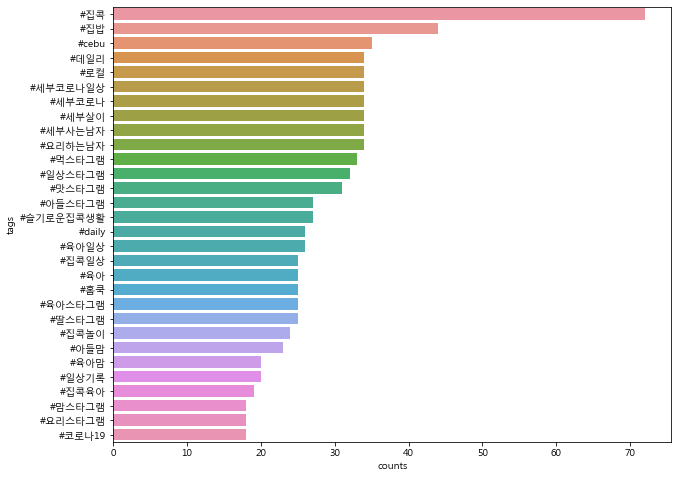

In [56]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts', y='tags', data= tag_counts_df)

In [ ]:
#지금까지 한 결과
날짜를 살펴본봐, 최근 1000건의 인스타 그램의 게시글이 새해와 크리스마스가 겹쳐,
코로나일상속에서 사람들이 어떤 일을 하는지에 대한 유의미한 인사이트를 많이 얻지 못했다.
그런점에서, 날짜를 기준으로 다시 데이터를 정제하여 11월달을 기준으로 코로나 일상의 
데이터를 얻어보도록 해야겠다. 

지금까지 얻은 인사이트 :  요리에 관련된 연관 검색어가 많이 올라와 있다.( 홈쿡, 먹스타그램, 맛스타그램, 요리하는 남자)
    최근 집에 있는 시간이 많아지며, 요리를 하는 남자에 대한 해시태그가 많이 올라와져 있는것을 확인할 수 있다.) 
    
    